# Análise de Modelos: Regressão Logística e Random Forest

In [ ]:

# Importação de Bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = 'malicious_phish.csv'
df = pd.read_csv(file_path)

In [3]:
df.fillna(df.mode().iloc[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
df.head(10)
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
types = df['type'].values
counter_types = Counter(types)

In [6]:
type_names = list(counter_types.keys())
type_values = list(counter_types.values())

In [8]:
sorted_indices = np.argsort(type_values)[::-1]
type_names = [type_names[i] for i in sorted_indices]
type_values = [type_values[i] for i in sorted_indices]

total_count = sum(type_values)
percentages = [value / total_count * 100 for value in type_values]

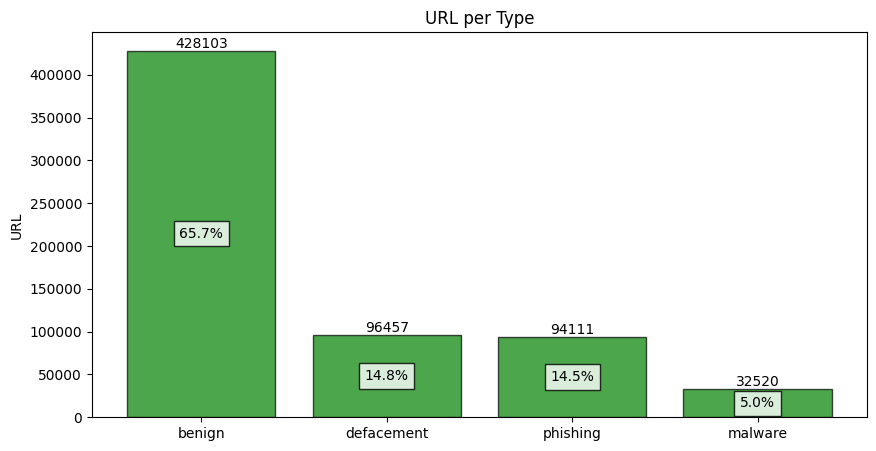

In [9]:
y_pos = np.arange(len(type_names))
plt.figure(1, figsize=(10, 5))
bars = plt.bar(y_pos, type_values, align='center', alpha=0.7, color='green', edgecolor='black')

for bar, value, percentage in zip(bars, type_values, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.xticks(y_pos, type_names)
plt.ylabel('URL')
plt.title('URL per Type')
plt.show()

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))


In [11]:
stemmer = SnowballStemmer("english")
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [12]:
CountVectorize = CountVectorizer()
feat = CountVectorize.fit_transform(df.text_sent)

In [13]:
trainX, testX, trainY, testY = train_test_split(feat, df.type, test_size=0.3, random_state=42)

In [14]:
# smote liba
smote = SMOTE(random_state=42)
trainX_smote, trainY_smote = smote.fit_resample(trainX, trainY)

In [15]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(trainX_smote, trainY_smote)
y_pred_lr = lr.predict(testX)

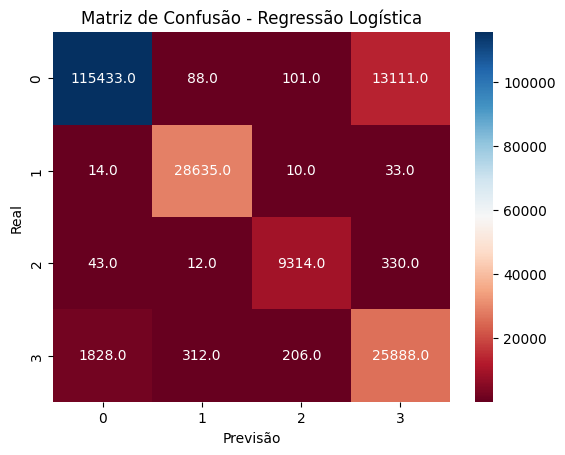

In [16]:
CM_LR = confusion_matrix(testY, y_pred_lr)
sns.heatmap(CM_LR, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [17]:
# Modelo de Linear Regression
#one_hot_encoder = OneHotEncoder()
#trainY_encoded = one_hot_encoder.fit_transform(trainY_smote.values.reshape(-1, 1)).toarray()
#reg = LinearRegression()
#reg.fit(trainX_smote, trainY_encoded)

LinearRegression()

In [ ]:
# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(trainX_smote, trainY_smote)
y_pred_rf = rf_model.predict(testX)

In [ ]:
# Matriz de confusão - Random Forest
CM_RF = confusion_matrix(testY, y_pred_rf)
sns.heatmap(CM_RF, annot=True, fmt=".1f", cmap="RdBu")
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

In [ ]:
# Comparação final das acurácias
accuracy_lr = lr.score(testX, testY)
accuracy_rf = rf_model.score(testX, testY)

comparacao_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [accuracy_lr, accuracy_rf]
})

comparacao_modelos.sort_values(by='Acurácia', ascending=False)